In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Artistic live art app
* 1. Create a function that given an image it creates and saves to disk a version of the image that looks similar to the example below.
* 2. Create another function that applies the same image transformation but this time it does it in real time using your webcam
* 3. Create a different effect and apply it to your live webcam stream

In [4]:
jan = cv2.imread("img/janpotter.png")


In [5]:
def image_modifier(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 90, 127)
    ret, thresh_binary_inverted = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY_INV)

    plt.figure(figsize = (10,15));
    plt.title("Your image")
    plt.imshow(thresh_binary_inverted, cmap='gray')

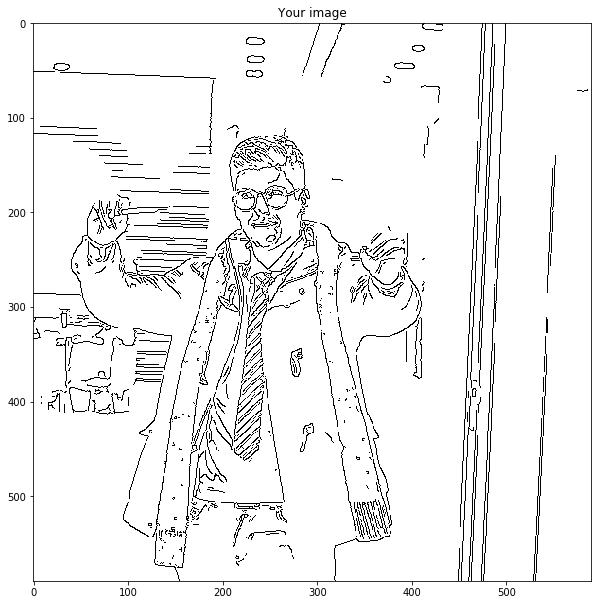

In [6]:
image_modifier(jan)

In [9]:
def video_modifier():
    cap = cv2.VideoCapture(0)

    while(True):
        #capture frame-by-frame
        ret, frame = cap.read()

        #our operations  on the frame come here
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        img = img.astype('uint8')
        edges = cv2.Canny(img, 90, 127)
        ret, thresh_binary_inverted = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY_INV)

        #Display the resulting frame
        cv2.imshow('Video, press \'q\' to close', thresh_binary_inverted)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [10]:
video_modifier()